### 1. Самостійно підібрати текст для шифрування (2-3 кб) та ключі довжини r = 2, 3, 4, 5, а також довжини 10-20 знаків. Зашифрувати обраний відкритий текст шифром Віженера з цими ключами.

In [6]:
from collections import Counter
def vigenere_zashifruvaty(vidkrytyi_tekst, kliuch):
    vidkrytyi_tekst = vidkrytyi_tekst.replace('ё', 'е')
    kliuch = kliuch.replace('ё', 'е')
    
    zashifrovanyi_tekst = []
    dovzhyna_kliucha = len(kliuch)
    kliuch_yak_int = [(ord(i) - ord('а')) % 32 for i in kliuch]
    vidkrytyi_tekst_int = [(ord(i) - ord('а')) % 32 for i in vidkrytyi_tekst if 'а' <= i <= 'я']
    
    for i in range(len(vidkrytyi_tekst_int)):
        znachennia = (vidkrytyi_tekst_int[i] + kliuch_yak_int[i % dovzhyna_kliucha]) % 32
        zashifrovanyi_tekst.append(chr(znachennia + ord('а')))
    return ''.join(zashifrovanyi_tekst)

nazva_faily = 'lab2.txt'
with open(nazva_faily, 'r', encoding='utf-8') as fail:
    vidkrytyi_tekst = fail.read()

kliuchi = [
    "да",
    "евс",
    "ключ",
    "кроль",
    "синийкрокс",
    "великийимогучийевсик"
]

for kliuch in kliuchi:
    zashifrovanyi_tekst = vigenere_zashifruvaty(vidkrytyi_tekst, kliuch)

    nazva_vykhidnoho_faily = f'zashifrovanyi_{len(kliuch)}.txt'

    with open(nazva_vykhidnoho_faily, 'w', encoding='utf-8') as vykhidnyi_fail:
        vykhidnyi_fail.write(zashifrovanyi_tekst)
    
    print(f"Tekst zashifrovanyi z kliuchom '{kliuch}' i zberizhenyi u fail '{nazva_vykhidnoho_faily}'")


Tekst zashifrovanyi z kliuchom 'да' i zberizhenyi u fail 'zashifrovanyi_2.txt'
Tekst zashifrovanyi z kliuchom 'евс' i zberizhenyi u fail 'zashifrovanyi_3.txt'
Tekst zashifrovanyi z kliuchom 'ключ' i zberizhenyi u fail 'zashifrovanyi_4.txt'
Tekst zashifrovanyi z kliuchom 'кроль' i zberizhenyi u fail 'zashifrovanyi_5.txt'
Tekst zashifrovanyi z kliuchom 'синийкрокс' i zberizhenyi u fail 'zashifrovanyi_10.txt'
Tekst zashifrovanyi z kliuchom 'великийимогучийевсик' i zberizhenyi u fail 'zashifrovanyi_20.txt'


### 2. Підрахувати індекси відповідності для відкритого тексту та всіх одержаних шифртекстів і порівняти їх значення.  

Indeks vidpovidnosti dlia vykhidoho tekstu: 0.0587
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'да': 0.0455
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'евс': 0.0393
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'ключ': 0.0349
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'кроль': 0.0380
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'синийкрокс': 0.0378
Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom 'великийимогучийевсик': 0.0355


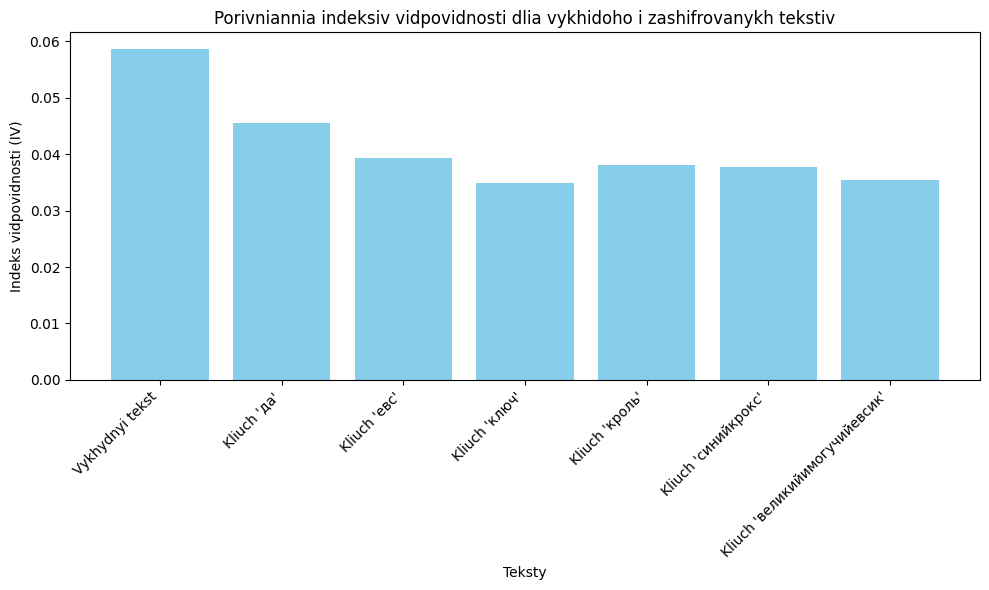

In [7]:
import matplotlib.pyplot as plt

def obchyslyty_iv(tekst):
    tekst = [symvol for symvol in tekst if 'а' <= symvol <= 'я']
    N = len(tekst)
    chastoty = {symvol: tekst.count(symvol) for symvol in set(tekst)}
    ic = sum(f * (f - 1) for f in chastoty.values()) / (N * (N - 1)) if N > 1 else 0
    return ic

nazva_faily = 'lab2.txt'
with open(nazva_faily, 'r', encoding='utf-8') as fail:
    vidkrytyi_tekst = fail.read()

kliuchi = [
    "да",
    "евс",
    "ключ",
    "кроль",
    "синийкрокс",
    "великийимогучийевсик"
]

iv_vidkrytyi_tekst = obchyslyty_iv(vidkrytyi_tekst)
print(f"Indeks vidpovidnosti dlia vykhidoho tekstu: {iv_vidkrytyi_tekst:.4f}")

ic_znachennia = [iv_vidkrytyi_tekst]
labels = ['Vykhydnyi tekst']

for kliuch in kliuchi:
    nazva_zashifrovanoho_faily = f'zashifrovanyi_{len(kliuch)}.txt'
    with open(nazva_zashifrovanoho_faily, 'r', encoding='utf-8') as zashifrovanyi_fail:
        zashifrovanyi_tekst = zashifrovanyi_fail.read()

    ic_zashifrovanyi = obchyslyty_iv(zashifrovanyi_tekst)
    print(f"Indeks vidpovidnosti dlia tekstu, zashifrovanoho kliuchom '{kliuch}': {ic_zashifrovanyi:.4f}")

    ic_znachennia.append(ic_zashifrovanyi)
    labels.append(f"Kliuch '{kliuch}'")

plt.figure(figsize=(10, 6))
plt.bar(labels, ic_znachennia, color='skyblue')
plt.xlabel('Teksty')
plt.ylabel('Indeks vidpovidnosti (IV)')
plt.title('Porivniannia indeksiv vidpovidnosti dlia vykhidoho i zashifrovanykh tekstiv')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


##### Дешифруємо текст

In [8]:
def vigenere_deshyfruvaty_ruskyi(tsyfrtekst, kliuch):
    tsyfrtekst = tsyfrtekst.replace('ё', 'е')
    kliuch = kliuch.replace('ё', 'е')

    deshyfrovanyi_tekst = []
    dovzhyna_kliucha = len(kliuch)
    kliuch_yak_int = [(ord(i) - ord('а')) % 32 for i in kliuch]
    tsyfrtekst_int = [(ord(i) - ord('а')) % 32 for i in tsyfrtekst if 'а' <= i <= 'я' or i == 'ё']
    
    for i in range(len(tsyfrtekst_int)):
        znachennia = (tsyfrtekst_int[i] - kliuch_yak_int[i % dovzhyna_kliucha]) % 32
        deshyfrovanyi_tekst.append(chr(znachennia + ord('а')))
    return ''.join(deshyfrovanyi_tekst)

kliuchi = [
    "да",
    "евс",
    "ключ",
    "кроль",
    "синийкрокс",
    "великийимогучийевсик"
]

for kliuch in kliuchi:
    nazva_zashifrovanoho_faily = f'zashifrovanyi_{len(kliuch)}.txt'
    with open(nazva_zashifrovanoho_faily, 'r', encoding='utf-8') as zashifrovanyi_fail:
        zashifrovanyi_tekst = zashifrovanyi_fail.read()

    deshyfrovanyi_tekst = vigenere_deshyfruvaty_ruskyi(zashifrovanyi_tekst, kliuch)

    nazva_deshyfrovanoho_faily = f'deshyfrovanyi_{len(kliuch)}.txt'

    with open(nazva_deshyfrovanoho_faily, 'w', encoding='utf-8') as deshyfrovanyi_fail:
        deshyfrovanyi_fail.write(deshyfrovanyi_tekst)
    
    print(f"Tekst, deshyfrovanyi kliuchom '{kliuch}', zberezhenyi u fail '{nazva_deshyfrovanoho_faily}'")


Tekst, deshyfrovanyi kliuchom 'да', zberezhenyi u fail 'deshyfrovanyi_2.txt'
Tekst, deshyfrovanyi kliuchom 'евс', zberezhenyi u fail 'deshyfrovanyi_3.txt'
Tekst, deshyfrovanyi kliuchom 'ключ', zberezhenyi u fail 'deshyfrovanyi_4.txt'
Tekst, deshyfrovanyi kliuchom 'кроль', zberezhenyi u fail 'deshyfrovanyi_5.txt'
Tekst, deshyfrovanyi kliuchom 'синийкрокс', zberezhenyi u fail 'deshyfrovanyi_10.txt'
Tekst, deshyfrovanyi kliuchom 'великийимогучийевсик', zberezhenyi u fail 'deshyfrovanyi_20.txt'


### 3. Використовуючи наведені теоретичні відомості, розшифрувати наданий шифртекст (згідно свого номеру варіанта). 

In [9]:
from collections import Counter

def indeks_vidpovidnosti(tekst):
    n = len(tekst)
    chastota = Counter(tekst)
    iv = sum(f * (f - 1) for f in chastota.values()) / (n * (n - 1))
    return iv

def rozdilyty_tekst_na_hrupy(tekst, r):
    hrupy = ['' for _ in range(r)]
    for i, symvol in enumerate(tekst):
        hrupy[i % r] += symvol
    return hrupy

def znajty_yimovirnu_dovzhynu_kliucha(tsyfrtekst, maks_dovzhyna_kliucha=30):
    znachennia_iv = []
    for r in range(2, maks_dovzhyna_kliucha + 1):
        hrupy = rozdilyty_tekst_na_hrupy(tsyfrtekst, r)
        serednie_iv = sum(indeks_vidpovidnosti(hrupa) for hrupa in hrupy) / r
        znachennia_iv.append((r, serednie_iv))
        print(f"Dovzhyna kliucha {r}: Indeks vidpovidnosti = {serednie_iv:.4f}")
    naikrashcha_dovzhyna = max(znachennia_iv, key=lambda x: x[1])[0]
    return naikrashcha_dovzhyna

def vhadaty_kliuch(tsyfrtekst, dovzhyna_kliucha):
    hrupy = rozdilyty_tekst_na_hrupy(tsyfrtekst, dovzhyna_kliucha)
    kliuch = []
    for hrupa in hrupy:
        chastoty = Counter(hrupa)
        naipopuliarnishyi_symvol = chastoty.most_common(1)[0][0]
        sdvyh = (ord(naipopuliarnishyi_symvol) - ord('о')) % 32
        kliuch.append(chr(ord('а') + sdvyh))

    return ''.join(kliuch)

def deshyfruvaty_vigenere(tsyfrtekst, kliuch):
    deshyfrovanyi_tekst = ''
    dovzhyna_kliucha = len(kliuch)
    for i, symvol in enumerate(tsyfrtekst):
        sdvyh = ord(kliuch[i % dovzhyna_kliucha]) - ord('а')
        deshyfrovanyi_symvol = chr(((ord(symvol) - ord('а') - sdvyh) % 32) + ord('а'))
        deshyfrovanyi_tekst += deshyfrovanyi_symvol
    return deshyfrovanyi_tekst

with open("variant_9.txt", 'r', encoding='utf-8') as file:
    tsyfrtekst = file.read()

dovzhyna_kliucha = znajty_yimovirnu_dovzhynu_kliucha(tsyfrtekst, maks_dovzhyna_kliucha=30)
print(f"Ymovirna dovzhyna kliucha: {dovzhyna_kliucha}")

kliuch = vhadaty_kliuch(tsyfrtekst, dovzhyna_kliucha)
print(f"Ymovirnyi kliuch: {kliuch}")

deshyfrovanyi_tekst = deshyfruvaty_vigenere(tsyfrtekst, kliuch)
print(f"Deshyfrovanyi tekst: {deshyfrovanyi_tekst}")


Dovzhyna kliucha 2: Indeks vidpovidnosti = 0.0329
Dovzhyna kliucha 3: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 4: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 5: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 6: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 7: Indeks vidpovidnosti = 0.0327
Dovzhyna kliucha 8: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 9: Indeks vidpovidnosti = 0.0327
Dovzhyna kliucha 10: Indeks vidpovidnosti = 0.0329
Dovzhyna kliucha 11: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 12: Indeks vidpovidnosti = 0.0326
Dovzhyna kliucha 13: Indeks vidpovidnosti = 0.0329
Dovzhyna kliucha 14: Indeks vidpovidnosti = 0.0328
Dovzhyna kliucha 15: Indeks vidpovidnosti = 0.0326
Dovzhyna kliucha 16: Indeks vidpovidnosti = 0.0330
Dovzhyna kliucha 17: Indeks vidpovidnosti = 0.0554
Dovzhyna kliucha 18: Indeks vidpovidnosti = 0.0326
Dovzhyna kliucha 19: Indeks vidpovidnosti = 0.0329
Dovzhyna kliucha 20: Indeks vidpovidnosti = 0.0326
Dovzhyna kliucha 21: Indeks vidpovidnos

In [10]:
kliuch = 'войнамагаэндшпиль'
deshyfrovanyi_tekst = deshyfruvaty_vigenere(tsyfrtekst, kliuch)

with open("deshyfrovanyi_voina_maga.txt", 'w', encoding='utf-8') as file:
    file.write(deshyfrovanyi_tekst)